In [75]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np
import warnings
import time
import seaborn as sns
import matplotlib.pyplot as plt
import random
import datetime

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re 

warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Name,sub_catagory,catagory
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brinjal And Beetroot Chips R,healthy,NaN
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Bok Choy Salad R,healthy,NaN
2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Lal Bhoplyacha Bharit (Red Pumpkin Raita) R,healthy,NaN
3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Beetroot Idli Fry R,healthy,NaN
4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Millet Curd Rice R,healthy,NaN


In [77]:
#Removes all unnecessary columns from df
l = ['Name','sub_catagory','catagory','description']
drop = []
columns = list(df.columns)
for col in columns:
    if col not in l:
        drop.append(col)
if drop!=[]:
    df = df.drop(drop,axis=1)
    
df.head()

,Name,sub_catagory,catagory
0,Brinjal And Beetroot Chips R,healthy,NaN
1,Bok Choy Salad R,healthy,NaN
2,Lal Bhoplyacha Bharit (Red Pumpkin Raita) R,healthy,NaN
3,Beetroot Idli Fry R,healthy,NaN
4,Millet Curd Rice R,healthy,NaN


In [78]:
#if category values in nv and name in l then add non-veg in the vg_nv column
l = ['chicken','wings','meat','salmon','salmons','cob','cobs','kebab','kebabs','fish','snake','gosht','bacon','mutton','lamb','egg','eggs']
nv = ['chicken','meat']
vg_nv = []

for name,cat in zip(df.Name,df.catagory):
    n = name.split()
    f=0
    if cat in nv:
        vg_nv.append('non-veg')
    else: 
        for i in n:
            if i.lower() in l:
                f=1
        if f==1:
            vg_nv.append('non-veg')
        else:
            vg_nv.append('veg')
            
df['Veg_Non'] = vg_nv
df.head()

,Name,sub_catagory,catagory,Veg_Non
0,Brinjal And Beetroot Chips R,healthy,NaN,veg
1,Bok Choy Salad R,healthy,NaN,veg
2,Lal Bhoplyacha Bharit (Red Pumpkin Raita) R,healthy,NaN,veg
3,Beetroot Idli Fry R,healthy,NaN,veg
4,Millet Curd Rice R,healthy,NaN,veg


Veg_Non
veg        364
non-veg    146
Name: count, dtype: int64


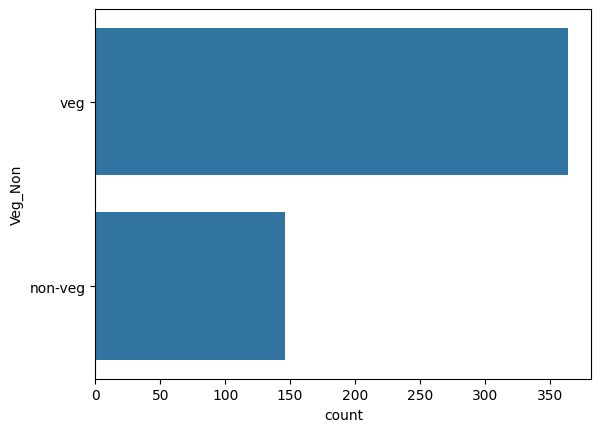

In [79]:
#Plotting to know the count of veg and non-veg users
print(df.Veg_Non.value_counts())
sns.countplot(df.Veg_Non)
plt.savefig('vegnon.png')

In [80]:
#add column review with random values
review = []
for i in range(df.shape[0]):
    review.append(random.randint(1,10))
df['Review'] = review
df.head()

,Name,sub_catagory,catagory,Veg_Non,Review
0,Brinjal And Beetroot Chips R,healthy,NaN,veg,1
1,Bok Choy Salad R,healthy,NaN,veg,1
2,Lal Bhoplyacha Bharit (Red Pumpkin Raita) R,healthy,NaN,veg,2
3,Beetroot Idli Fry R,healthy,NaN,veg,7
4,Millet Curd Rice R,healthy,NaN,veg,2


<Axes: ylabel='count'>

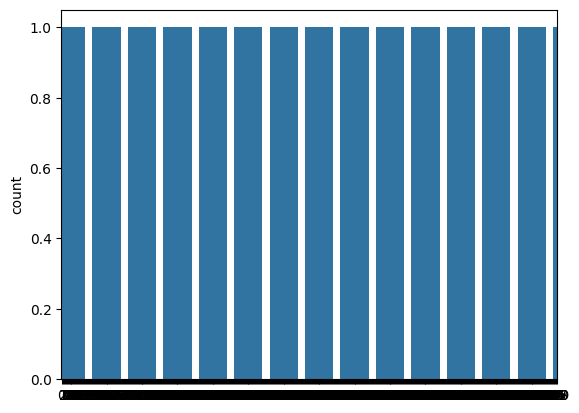

In [81]:
sns.countplot(df.Review)

In [82]:
class Nutrient:
    
    def __init__(self,df):
        self.df = df
        pass
    
    def Iron(self):
        url = 'https://www.redcrossblood.org/donate-blood/blood-donation-process/before-during-after/iron-blood-donation/iron-rich-foods.html'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'par-33'})
        l=[]
        iron = []
        for html in s:
            l = html.ul.text.split('\n')
            l = l[1:-1]
            iron = iron+l
        iron = ['red meat', 'poultry', 'eggs','egg', 'fruits', 'green' , 'fortified bread'] + iron
        return iron
    
    def Calcium(self):
        url = 'https://www.medicalnewstoday.com/articles/322585.php#non-dairy-sources-of-calcium'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('h3')
        calcium = []
        for i in s:
            if '.' in i.text:  # Ensure there is a period in the text
                try:
                    food = i.text.split('.')[1].strip()  # Extract food name after period
                    calcium.append(food)
                except IndexError:
                    continue  # Skip if splitting fails
        calcium =['keer','yogurt', 'cheese', 'milk', 'salmon', 'leafy green','Cappuccino'] + calcium
        return calcium
    
    def Sodium(self):
        url = 'https://www.healthline.com/nutrition/foods-high-in-sodium#section1'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        sodium = []
        for i in s[:-1]:
            sodium.append(i.a.text.split('.')[1].strip())
        sodium = ['salt', 'soy sauce', 'vegetables'] + sodium
        return sodium
    
    def Iodine(self):
        url = 'https://www.healthline.com/nutrition/iodine-rich-foods#section1'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        iodine = []
        for i in s[:-1]:
            iodine.append(i.a.text.split('.')[1].strip())
        iodine = [ 'salt', 'seafood'] + iodine
        return iodine
    
    def Magnesium(self):
        url = 'https://www.healthline.com/nutrition/10-foods-high-in-magnesium#section11'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        magnesium = []
        for i in s[:-1]:
            magnesium.append(i.a.text.split('.')[1].strip())
        magnesium =['chocolate','Spinach', 'broccoli', 'legumes', 'seeds'] + magnesium
        return magnesium
    
    def Selenium(self):
        url = 'https://www.healthline.com/health/selenium-foods#cashews'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        selenium = []
        for i in s[2:]:
            selenium.append(i.a.text.split('.')[1].strip())
        selenium = ['banana','Organ meat', 'seafood', 'walnuts'] + selenium
        return selenium
    
    def Protien(self):
        url = 'https://www.healthline.com/nutrition/20-delicious-high-protein-foods'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        protien = []
        for i in s[:-1]:
            protien.append(i.a.text.split('.')[1].strip())
        protien = protien + ['cookie','cookies','mutton','meat','gosht','Chicken','Wings','Meat','Salmon','Cob','Kebab','Fish','Snake','Gosht','Bacon','Mutton','Lamb']
        url = 'https://www.medicalnewstoday.com/articles/321522.php#high-protein-foods-for-weight-loss'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('p')
        for p in s:
            if p.strong:
                protien.append(p.strong.text.split('.')[1].strip())
        return protien
    
    def Carbohydrates(self): 
        url = 'https://www.healthline.com/nutrition/12-healthy-high-carb-foods'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        carb = []
        for i in s[:-1]:
            carb.append(i.a.text.split('.')[1].strip())
        url = 'https://www.tuasaude.com/en/high-carb-foods/'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('td')
        for i in range(3,len(s),3):
            carb.append(s[i].text.strip())
        carb = carb +['Vegetables','High carb grains','High carb fruits','High carb dried fruits','High carb pulses','Poha','aloo','buttter','ghee','rice','biryani','pulao']
        return carb
    
    def Vitamin_c(self):
        Vitamin_C = ['margarita','Citrus fruit',' potatoes', 'broccoli', 'bell peppers', 'spinach','strawberries','tomatoes', 'Brussels sprouts']
        return Vitamin_C
    
    def Vitamin_A(self):
        return ['beef', 'liver', 'eggs','egg', 'shrimp', 'fish', 'fortified milk',' sweet potatoes', 'carrots', 'pumpkins', 'spinach',' mangoes']

    def Vitamin_D(self):
        return ['milk' ,'cereals',' fatty','fish']

    def Vitamin_E(self):
        return ['vegetables oils', 'leafy green', 'whole grains', 'nuts']

    def Vitamin_K(self):
        return ['Cabbage', 'eggs','egg',' milk', 'spinach', 'broccoli',' kale']
    
    def Chloride(self):
        return ['salt']

    def Potassium(self):
        return ['cake','meat', 'milk', 'fruits', 'vegetables', 'grains', 'legumes']
  
    def Chromium(self):
        return ['meat', 'poultry', 'fish', 'nuts', 'cheese']

    def Copper(self):
        return ['shellfish', 'nuts', 'seeds', 'beans',' prunes']

    def Fluoride(self):
        return ['fish', 'teas']
    
    def Manganese(self):
        return ['nuts', 'legumes', 'whole grains', 'tea','coffee','chai']

    def Zinc(self):
        return ['meat', 'shellfish', 'legumes', 'whole grains']

    def Fiber(self):
        return ['Salad','salad']

    def Phosphorus(self):
        return ['paneer','kebab']
    #nutritions store all the foods with nutrition as key and its foods ass value
    def apply(self):
        Nutritions = {'Phosphorus':self.Phosphorus(),'Fiber':self.Fiber(),
                  'Vitamin_c':self.Vitamin_c(),'Vitamin_A':self.Vitamin_A(),'Vitamin_D':self.Vitamin_D(),'Vitamin_E':self.Vitamin_E(),'Vitamin_K':self.Vitamin_K(),
                 'Calcium':self.Calcium(),'Chloride':self.Chloride(),'Magnesium':self.Magnesium(),'Potassium':self.Potassium(),'Sodium':self.Sodium(),
                  'Chromium':self.Chromium(),'Copper':self.Copper(),'Fluoride':self.Fluoride(),
                  'Iodine':self.Iodine(),'Iron':self.Iron(),'Manganese':self.Manganese(),'Selenium':self.Selenium(),'Zinc':self.Zinc(),'Protien':self.Protien(),'Carbohydrates':self.Carbohydrates()}

        
        nutrient = []
        tokens = []
        for i in df.Name:
            N = [k.lower() for k in i.split()]
            tokens.append(N)

        for value in tokens:
            f = 1
            for key, values in Nutritions.items():
                for i in [k.lower() for k in values]:
                    if i in value and f == 1:
                        nutrient.append(key)
                        f = 0
            if f == 1:
                nutrient.append(np.nan)
                f = 0

        self.df['Nutrient'] = nutrient
ob = Nutrient(df)
ob.apply()

print('missing values:',df.Nutrient.isnull().sum())
    

missing values: 256


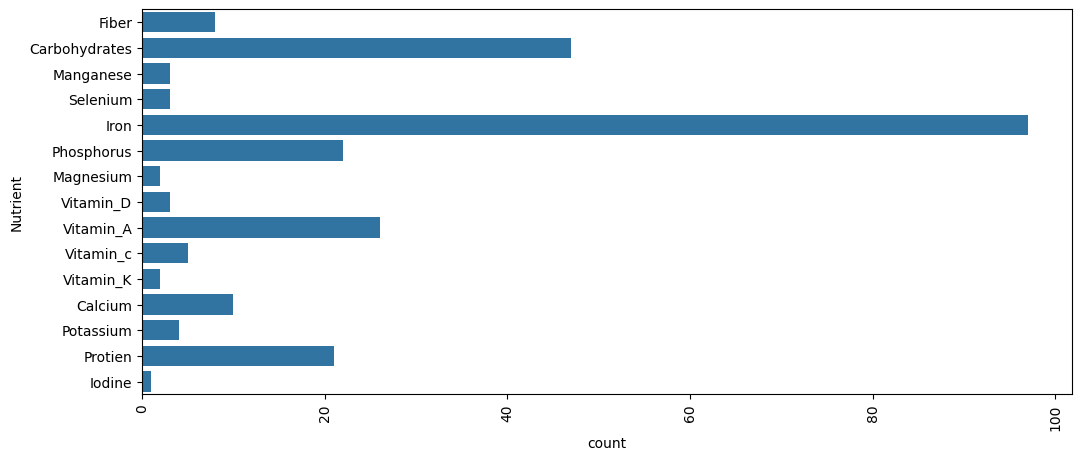

In [83]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.countplot(df.Nutrient)
plt.savefig('nutrient.png')

In [84]:
class Disease:
    
    def __init__(self,df):
        self.df = df
        name = []
        for i in df.Name:
            l = [str(j).lower() for j in str(i).split()]
            name += l
        self.name = name
        self.nutrient = [str(i).lower() for i in df.Nutrient.unique()]
        
    def removestop(self,tokens):
        # Download the stopwords if not available
        nltk.download('stopwords')
        stop = set(stopwords.words('english'))
        file = open('stopwords.txt','r')
        l = list(file.read().split())
        stop = list(stop) +l
        l = [token for token in tokens if token not in stop]
        return l
    
    def extract(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))
    
    def assemble(self):
        heart_disease = self.extract('https://www.healthline.com/nutrition/heart-healthy-foods#section14')
        hypertension = self.extract('https://www.healthline.com/health/foods-good-for-high-blood-pressure#takeaway')
        obesity = self.extract('https://www.healthline.com/nutrition/20-most-weight-loss-friendly-foods')
        diabeties = self.extract('https://www.healthline.com/nutrition/16-best-foods-for-diabetics#section1')
        kidney_disease = self.extract('https://www.healthline.com/nutrition/best-foods-for-kidneys#4')
        pregnancy = self.extract('https://www.healthline.com/nutrition/13-foods-to-eat-when-pregnant')
        cancer = self.extract('https://www.healthline.com/nutrition/cancer-and-diet#cancer-foods')
        rickets = self.extract('https://www.healthline.com/nutrition/9-foods-high-in-vitamin-d#1')
        scurvy = self.extract('https://www.healthline.com/nutrition/vitamin-c-foods')
        anemia = self.extract('https://www.healthline.com/health/best-diet-plan-for-anemia')
        goitre = self.extract('https://www.healthline.com/nutrition/hypothyroidism-diet')
        eye_disease = self.extract('https://www.healthline.com/nutrition/foods-high-in-vitamin-a')
        
        diseases = {'heart_disease':heart_disease,'hypertension':hypertension,'obesity':obesity,'diabeties':diabeties,
                   'kidney_disease':kidney_disease,'pregnancy':pregnancy,'cancer':cancer,'rickets':rickets,'scurvy':scurvy,
                   'anemia':anemia,'goitre':goitre,'eye_disease':eye_disease}
        
        disease = []
        for i in range(df.shape[0]):
            temp = []
            name,nutrient = [i.lower() for i in self.df.loc[i,'Name'].split()],str(self.df.loc[i,'Nutrient']).split()
            for key,values in diseases.items():
                for value in values:
                    if value in name or  value in nutrient:
                        temp.append(key)
            temp = list(set(temp))
            
            s=''
            for i in temp:
                s+=' '+i
            
            if s=='':
                disease.append(np.nan)
            else:
                disease.append(s)
            
                
        for i in range(len(disease)):
            if disease[i]==[]:
                disease[i] = np.nan

        self.df['Disease'] = disease
        

    
ob = Disease(df)
ob.assemble()
print('missing values:',df.Disease.isnull().sum()) 
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[

missing values: 234


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
df.head(3)


,Name,sub_catagory,catagory,Veg_Non,Review,Nutrient,Disease
0,Brinjal And Beetroot Chips R,healthy,NaN,veg,1,NaN,NaN
1,Bok Choy Salad R,healthy,NaN,veg,1,Fiber,rickets diabeties kidney_disease goitre
2,Lal Bhoplyacha Bharit (Red Pumpkin Raita) R,healthy,NaN,veg,2,NaN,diabeties anemia goitre


In [86]:
class Diet:
    
    def __init__(self,df):
        self.df = df
        name = []
        for i in df.Name:
            l = [str(j).lower() for j in str(i).split()]
            name += l
        self.name = name
        self.nutrient = [str(i).lower() for i in df.Nutrient.unique()]
        
    def removestop(self,tokens):
        stop = set(stopwords.words('english'))
        file = open('stopwords.txt','r')
        l = list(file.read().split())
        stop = list(stop) +l
        l = [token for token in tokens if token not in stop]
        return l
    
    def extract(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))
    
    def type_a(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[3].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))
                                                 
    def type_o(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[2].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))   

    def paleo_diet(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[1].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))
    
    

    def low_sodium_diet(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[2].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))

    def gluten_free_diet(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[4].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))

    def Mediterranean_diet(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[3].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))

    def low_carb_diet(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[2].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))
    
    def assemble(self):
        vegan_diet = self.extract('https://www.healthline.com/nutrition/foods-vegans-eat#section12')
        high_protien_diet = self.extract('https://www.medicalnewstoday.com/articles/321522#high-protein-foods-for-weight-loss')
        type_a_diet= self.type_a('https://www.healthline.com/health/a-positive-blood-type-diet#foods-to-eat')
        type_o_diet = self.type_o('https://www.healthline.com/health/O-positive-blood-type-diet')
        paleo_diet = self.paleo_diet('https://www.healthline.com/nutrition/paleo-diet-meal-plan-and-menu#section3')
        low_sodium_diet = self.low_sodium_diet('https://www.healthline.com/nutrition/low-sodium-diet#foods-to-eat')
        low_fat_diet = self.extract('https://www.healthline.com/nutrition/healthy-low-fat-foods#section1')
        gluten_free_diet = self.gluten_free_diet('https://www.healthline.com/nutrition/gluten-free-diet#foods-to-eat')
        high_fiber_diet = self.extract('https://www.healthline.com/nutrition/22-high-fiber-foods')
        hormone_diet = self.extract('https://www.webmd.com/diet/a-z/hormone-diet')
        Mediterranean_diet = self.Mediterranean_diet('https://www.healthline.com/nutrition/mediterranean-diet-meal-plan#foods-to-eat')
        low_carb_diet = self.low_carb_diet('https://www.healthline.com/nutrition/low-carb-diet-meal-plan-and-menu#foods-to-eat')
        alkaline_diet = self.extract('https://food.ndtv.com/food-drinks/8-alkaline-foods-you-should-include-in-your-daily-diet-1460436')
        ketogenic_diet = self.extract('https://www.healthline.com/nutrition/ketogenic-diet-foods#section1')
        dash_diet = self.extract('https://www.berkeleylife.com/wellness/functional-foods/shopping-list-dash-diet-foods/')

        diseases = {'vegan_diet':vegan_diet,'high_protien_diet':high_protien_diet,'type_a_diet':type_a_diet,'type_o_diet':type_o_diet,
                   'paleo_diet':paleo_diet,'low_sodium_diet':low_sodium_diet,'low_fat_diet':low_fat_diet,'gluten_free_diet':gluten_free_diet,
                   'high_fiber_diet':high_fiber_diet,'hormone_diet':hormone_diet,'Mediterranean_diet':Mediterranean_diet,
                   'low_carb_diet':low_carb_diet,'alkaline_diet':alkaline_diet,'ketogenic_diet':ketogenic_diet,'dash_diet':dash_diet}
        
        disease = []
        for i in range(df.shape[0]):
            temp = []
            name,nutrient = [i.lower() for i in df.loc[i,'Name'].split()],str(df.loc[i,'Nutrient']).lower()
            for key,values in diseases.items():
                for value in values:
                    if value in name or  value == nutrient:
                        temp.append(key)
            temp = list(set(temp))
            s=''
            for i in temp:
                s+=' '+i
            
            if s=='':
                disease.append(np.nan)
            else:
                disease.append(s)
            
                
        for i in range(len(disease)):          
            if disease[i]==[]:
                disease[i] = np.nan

        self.df['Diet'] = disease
        

    
ob = Diet(df)
ob.assemble()
print('missing values:',df.Diet.isnull().sum())

missing values: 199


In [87]:
df.head()

,Name,sub_catagory,catagory,Veg_Non,Review,Nutrient,Disease,Diet
0,Brinjal And Beetroot Chips R,healthy,NaN,veg,1,NaN,NaN,NaN
1,Bok Choy Salad R,healthy,NaN,veg,1,Fiber,rickets diabeties kidney_disease goitre,high_fiber_diet high_protien_diet ketogenic_d...
2,Lal Bhoplyacha Bharit (Red Pumpkin Raita) R,healthy,NaN,veg,2,NaN,diabeties anemia goitre,high_protien_diet
3,Beetroot Idli Fry R,healthy,NaN,veg,7,NaN,NaN,NaN
4,Millet Curd Rice R,healthy,NaN,veg,2,Carbohydrates,heart_disease goitre rickets diabeties kidney...,ketogenic_diet high_protien_diet vegan_diet


In [88]:
missing_values = df.isnull().sum().sort_values(ascending=False)
perc_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([missing_values,perc_missing],axis=1,keys=['Total','Percent'])

missing_data

,Total,Percent
catagory,510,1.000000
Nutrient,256,0.501961
Disease,234,0.458824
Diet,199,0.390196
Name,0,0.000000
sub_catagory,0,0.000000
Veg_Non,0,0.000000
Review,0,0.000000


In [89]:
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='healthy'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Fibre' 
    
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='snacks'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
            
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='meat' and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='rice' and df.loc[i,'Nutrient'] == 'none': 
        df.loc[i,'Nutrient'] = 'Carbohydrates'
        
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='chicken'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='seafood'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Vitamin_A'

for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='bread'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='vegetarian'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Calcium'        

        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='breakfast'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Iron'  
       

for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='dinner'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Carbohydrates'   
        

print(df[df['Nutrient']=='none'].shape)

        

(0, 8)


In [90]:
l = ['Cookie','Cookies','cookie','cookies']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'cookie'
df[df['catagory']=='cookie']
df[df['catagory']=='cookie'].shape

l = ['Paneer','paneer']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'paneer'
df[df['catagory']=='paneer'].shape

l = ['Salad','salad']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'salad'
df[df['catagory']=='salad'].shape

l = ['Thandai','thandai']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'thandai'
df[df['catagory']=='thandai'].shape

l = ['milk','Milk']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'milk'
df[df['catagory']=='milk'].shape

l = ['soup','Soup']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'soup'
df[df['catagory']=='soup'].shape

l = ['margarita','Margarita']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'margarita'
df[df['catagory']=='margarita'].shape

l = ['Tea','tea','chai','Chai']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'tea'
df[df['catagory']=='tea'].shape

l = ['ESPRESSO','CAPPUCCINO','CAFÉ LATTE','MACCHIATO','AMERICANO','DECAFFEINATED','Coffee','CAFÉ LATTE']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'coffee'
df[df['catagory']=='coffee'].shape

l = ['Wine','wine']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'wine'
df[df['catagory']=='wine'].shape

l = ['Cake','cake']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'cake'
df[df['catagory']=='cake'].shape

from collections import Counter
l = []
for i in range(df.shape[0]):
    s = df.loc[i,'Name'].split()
    for j in s:
        l.append(j.lower())
        
d = Counter(l)


l = ['chicken', 'almond', 'chocolate', 'kheer', 'cake', 'curry', 'rice', 'biryani', 'halwa', 'fish', 'aloo', 'mutton',
    
     'cookies', 'baked', 'kebab', 'christmas', 'ladoo', 'badam', 'strawberry', 'apple', 'salad', 'tikka', 'lamb',
     
     'soup', 'banana', 'vada', 'bread', 'sauce', 'kaju', 'paneer', 'prawn', 'barfi', 'mango', 'thandai', 'coconut',
     
     'dahi', 'pizza', 'modak', 'rasmalai', 'dal', 'malai', 'gosht', 'kofta', 'gujiya', 'pasta', 
     
     'pulao', 'methi',  'poha', 'butter', 'dosa', 'carrot', 'chaat','kebabs', 'kulfi', 'gajar',
     
     'korma', 'pista', 'gulab', 'khichdi', 'palak', 'roti', 'roast', 'tikki','cheese', 'matar', 'smoothie',
     
     'cranberry', 'sabudana', 'rabdi', 'berry', 'coffee','paratha', 'walnut', 'spicy', 'potato', 'beetroot',
     
      'anjeer', 'samosa', 'kachori', 'gulkand', 'risotto', 'margarita','honey', 'corn', 'nuts', 'roasted', 
     
      'spinach', 'sev','cardamom', 'dome', 'sangria','chawal', 'arbi', 'mushroom', 'tea', 'egg', 'pie',
     
      'parantha', 'kulcha', 'khaja', 'rabri', 'jalebi', 'bhaji','chilli', 'tricolour', 'chikki', 'zucchini',
     
     'gluten-free', 'barley', 'raspberry', 'chakli', 'dip', 'shankarpali', 'dessert', 'cashew', 'tomato', 'soya',
     
     'stuffed', 'chana', 'steam', 'bao', 'peda', 'tiranga', 'pav', 'idli', 'seed', 'saffron', 'love', 'chutney',
     
     'cocktail', 'mint', 'garlic', 'turkey', 'microwave', 'wrapped', 'keema', 'shami',
     
     'ghevar', 'pancakes', 'pudding', 'papad',]


for i in range(df.shape[0]):
    
    if str(df.loc[i,'catagory']) == 'nan':
        s = df.loc[i,'Name'].split()
        for j in s:
            if j.lower() in l:
                df.loc[i,'catagory'] = j.lower()
 
l = []
for i in range(df.shape[0]):
    s = df.loc[i,'Name'].split()
    for j in s:
        l.append(j.lower())
    
d = Counter(l)
sorted(d.items(),key = lambda x:x[1],reverse=True)
l = [i[0] for i in sorted(d.items(),key = lambda x:x[1],reverse=True) if i[1]<5 and i[1]>2]

l = ['broccoli',  'shorba', 'gluten', 'scotch', 'lentil', 'kahwa', 'kiwi', 'oats', 'wings', 'momos',
     
     'gajak','salmon', 'appam', 'basil', 'pithe', 'warm', 'kinnu', 'punch', 'spanish', 'milk', 'fresh', 'cappuccino',
     
      'plum','tawa', 'kadai', 'kofte', 'malabari', 'coriander','pistachio', 'kalakand', '(vrat)', 'upma', 'dundee',
     
     'gehun', 'sushi', 'khoya','panacotta', 'eggless', 'easter', 'kashmiri', 'khus', 'besan', 'sohan', 'panjiri',
     
     'malpua', 'payesh', 'imarti', 'atte', 'petha', 'omelette','laddu', 'chhena', 'almonds', 'chargrilled', 'bell',
     
     'glazed', 'watermelon', 'polenta', 'recipe', 'som', 'tam', 'tangy', 'amaranth', 'moong', 'missi', 
     
     'quesadilla', 'dragon', 'fire', 'argentino', 'belgian', 'chop', 'moonglet', 'lasooni', 
     
      'pakori', 'zaitooni', 'croquettes','gujiyas', 'hariyali', 'apricot', 'gokul', 'shower', 'devils', 'onion',
     
     'gur', 'maple', 'ice', 'desi', 'gobhi', 'mastani', 'drink', 'hot', 'mocha', 'whisky', 'bourbon', 'irish',
     
     'boondi','amritsari', 'cauliflower', 'rum', 'fritters', 'seared', 'crab', 'cajun', 'bacon', 'mongolian', 
     
     
     
     'rava', 'pineapple', 'bruschetta', 'breton', 'luchi',
     
     'parotta', 'poppy', 'brownie', 'macaroons', 'crunch','turkish','vanilla', 'cinnamon', 'cookie', 'indian',
     
     'bedmi', 'raseele', 'suji', 'zaffrani', 'nariyal', 'aanarsa', 'assorted', 'yogurt', 'creamy', 'sheer',
     'pakode', 'kele', 'thepla', 'bonda', 'singhare', 'jalapeno', 'makki', 'chole', 'daal', 'pani', 'keerai',
     
     'vadi', 'basundi', 'dhokli', 'dhokla', 'pohe', 'papdi', 'ras']

for i in range(df.shape[0]):
    
    if str(df.loc[i,'catagory']) == 'nan':
        s = df.loc[i,'Name'].split()
        for j in s:
            if j.lower() in l:
                df.loc[i,'catagory'] = j.lower()
                
print('Catagory column with null values',df[df['catagory'].isnull()].shape)



Catagory column with null values (116, 8)


In [91]:
col = list(df.columns)
missing_values = []
for i in col:
    missing_values.append(df[i].isnull().sum())
    
missing_df = pd.DataFrame({'Columns':col,'Total_missing':missing_values})
print(df.shape)
missing_df

(510, 8)


,Columns,Total_missing
0,Name,0
1,sub_catagory,0
2,catagory,116
3,Veg_Non,0
4,Review,0
5,Nutrient,256
6,Disease,234
7,Diet,199


In [92]:

df.head(5)


,Name,sub_catagory,catagory,Veg_Non,Review,Nutrient,Disease,Diet
0,Brinjal And Beetroot Chips R,healthy,beetroot,veg,1,NaN,NaN,NaN
1,Bok Choy Salad R,healthy,salad,veg,1,Fiber,rickets diabeties kidney_disease goitre,high_fiber_diet high_protien_diet ketogenic_d...
2,Lal Bhoplyacha Bharit (Red Pumpkin Raita) R,healthy,NaN,veg,2,NaN,diabeties anemia goitre,high_protien_diet
3,Beetroot Idli Fry R,healthy,idli,veg,7,NaN,NaN,NaN
4,Millet Curd Rice R,healthy,rice,veg,2,Carbohydrates,heart_disease goitre rickets diabeties kidney...,ketogenic_diet high_protien_diet vegan_diet


In [93]:
df = df[df['Nutrient'].notna()]
df = df[df['catagory'].notna()]
df = df[df['Disease'].notna()]
df = df[df['Diet'].notna()]
df = df.reset_index(drop=True)

name = []
for i in df.Name:
    name.append(str.lower(i.strip()))
df['Name'] = name
n = []
for i in df.Nutrient:
    n.append(str.lower(i.strip()))
df['Nutrient'] = n


df = df.drop('sub_catagory',axis=1)

Adding a Columns User

In [94]:
l = []
for i in range(1,101):
    l.append(i)
user = []
for i in range(df.shape[0]):
    user.append(random.choice(l))

df['User_Id'] = user

In [95]:
meal_name = list(df.Name.unique())
print(len(meal_name))
d = {}
for i in range(0,156):
    d[meal_name[i]] = f'meal_id{i+1}'
l = []
for i in range(df.shape[0]):
    l.append(d[df.loc[i,'Name']])
    
df['Meal_Id'] = l


df.head()

156


,Name,catagory,Veg_Non,Review,Nutrient,Disease,Diet,User_Id,Meal_Id
0,bok choy salad r,salad,veg,1,fiber,rickets diabeties kidney_disease goitre,high_fiber_diet high_protien_diet ketogenic_d...,14,meal_id1
1,millet curd rice r,rice,veg,2,carbohydrates,heart_disease goitre rickets diabeties kidney...,ketogenic_diet high_protien_diet vegan_diet,57,meal_id2
2,methi turmeric tea r,tea,veg,10,manganese,heart_disease,ketogenic_diet,100,meal_id3
3,tricolor veggie delight salad r,salad,veg,1,fiber,goitre rickets hypertension kidney_disease di...,ketogenic_diet high_protien_diet low_fat_diet...,50,meal_id4
4,non fried masala banana chips r,banana,veg,10,selenium,hypertension cancer,ketogenic_diet vegan_diet alkaline_diet high_...,43,meal_id5


In [96]:

df.isnull().sum()

Name        0
catagory    0
Veg_Non     0
Review      0
Nutrient    0
Disease     0
Diet        0
User_Id     0
Meal_Id     0
dtype: int64

In [104]:
df_activity = df[['User_Id','Meal_Id','Name','catagory','Veg_Non','Review','Nutrient','Disease','Diet']]

Demo dataset for 100 user profiles

In [112]:
df_profiles = df[['User_Id','Veg_Non','Nutrient','Disease','Diet']]

df_profiles = df_profiles.drop_duplicates('User_Id').sort_values('User_Id').reset_index(drop=True)

user = []
for i in range(df_profiles.shape[0]):
    k = df_profiles.loc[i,'User_Id']
    user.append(f'User_{k}')
df_profiles['User_Id'] = user
df_profiles.to_csv('user_Profiles.csv',index=False)
df_profiles.head(3)

,User_Id,Veg_Non,Nutrient,Disease,Diet
0,User_1,non-veg,iron,obesity goitre rickets hypertension diabeties...,alkaline_diet high_protien_diet ketogenic_die...
1,User_2,non-veg,iron,obesity goitre rickets hypertension diabeties...,alkaline_diet high_protien_diet ketogenic_die...
2,User_4,non-veg,vitamin_a,obesity heart_disease goitre rickets hyperten...,ketogenic_diet vegan_diet alkaline_diet low_f...


In [52]:

df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   86 non-null     object
 1   Veg_Non   86 non-null     object
 2   Nutrient  86 non-null     object
 3   Disease   86 non-null     object
 4   Diet      86 non-null     object
dtypes: object(5)
memory usage: 3.5+ KB


Demo data for user Recent activity (min 30 days)

In [ ]:
user = []
for i in range(df.shape[0]):
    k = df.loc[i,'User_Id']
    user.append(f'User_{k}')
df['User_Id'] = user

In [53]:
df_recent = df[['User_Id','Meal_Id']]
df_recent
Rated = []
liked = []
searched = []
Purchased = []
for i in range(df.shape[0]):
    Rated.append(random.randint(0,1)) # if rated > 5
    liked.append(random.randint(0,1))
    searched.append(random.randint(0,1))
    Purchased.append(random.randint(0,1))
    
df_recent['Rated'] =  Rated
df_recent['Liked'] = liked
df_recent['Searched'] = searched
df_recent['Purchased'] = Purchased
df_recent = df_recent[((df_recent.Rated+df_recent.Liked+df_recent.Searched)>=1) & ((df_recent.Rated+df_recent.Liked+df_recent.Searched)<2)]
df_recent =df_recent.head(30).reset_index(drop=True)
dt = datetime.datetime(2020, 3, 1)
end = datetime.datetime(2020, 3, 30)
step = datetime.timedelta(hours=2,seconds=34)

result = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step
    
    

date = []
for i in range(30):
    date.append(random.choice(result))
    
date = sorted(date)
df_recent['Timestamp'] = date
df_recent.to_csv('recent_activity.csv',index=False)
df_recent.head(3)

,User_Id,Meal_Id,Rated,Liked,Searched,Purchased,Timestamp
0,53,meal_id2,0,0,1,0,2020-03-01 12:03:24
1,50,meal_id3,0,0,1,1,2020-03-02 06:08:30
2,27,meal_id6,0,0,1,0,2020-03-02 16:11:20


In [54]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_Id    30 non-null     int64 
 1   Meal_Id    30 non-null     object
 2   Rated      30 non-null     int64 
 3   Liked      30 non-null     int64 
 4   Searched   30 non-null     int64 
 5   Purchased  30 non-null     int64 
 6   Timestamp  30 non-null     object
dtypes: int64(5), object(2)
memory usage: 1.8+ KB


Dataset to recommend with

In [99]:

df_f = df[['Meal_Id','Name','catagory','Veg_Non','Nutrient','Disease','Diet','Review']]
df_f.to_csv('dataset.csv',index=False)
df_f.head(3)

,Meal_Id,Name,catagory,Veg_Non,Nutrient,Disease,Diet,Review
0,meal_id1,bok choy salad r,salad,veg,fiber,rickets diabeties kidney_disease goitre,high_fiber_diet high_protien_diet ketogenic_d...,1
1,meal_id2,millet curd rice r,rice,veg,carbohydrates,heart_disease goitre rickets diabeties kidney...,ketogenic_diet high_protien_diet vegan_diet,2
2,meal_id3,methi turmeric tea r,tea,veg,manganese,heart_disease,ketogenic_diet,10


In [100]:

df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Meal_Id   176 non-null    object
 1   Name      176 non-null    object
 2   catagory  176 non-null    object
 3   Veg_Non   176 non-null    object
 4   Nutrient  176 non-null    object
 5   Disease   176 non-null    object
 6   Diet      176 non-null    object
 7   Review    176 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 11.1+ KB


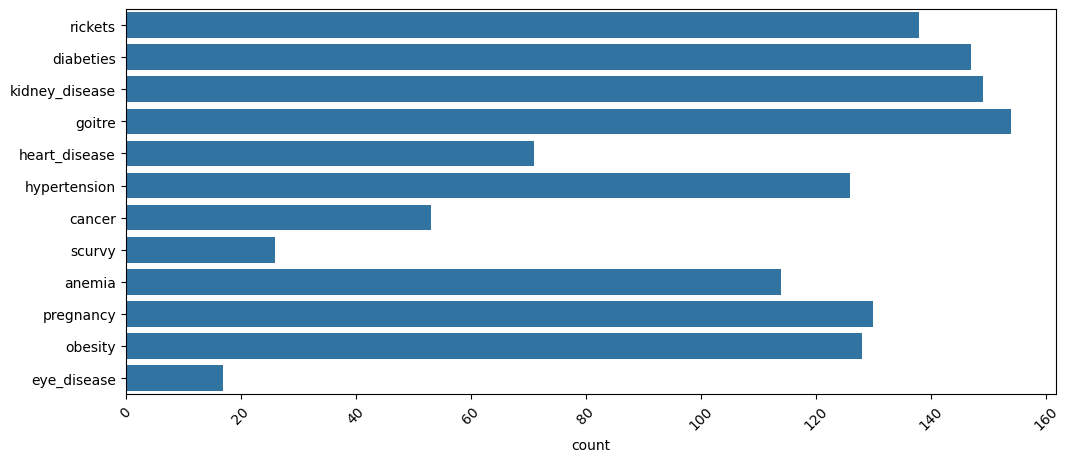

In [101]:
plt.figure(figsize=(12,5))
disease = []
for i in range(df_f.shape[0]):

    for j in (df_f.loc[i,'Disease']).split():
        disease.append(j)

sns.countplot(disease)
plt.xticks(rotation=45)
plt.savefig('disease.png')
plt.show()

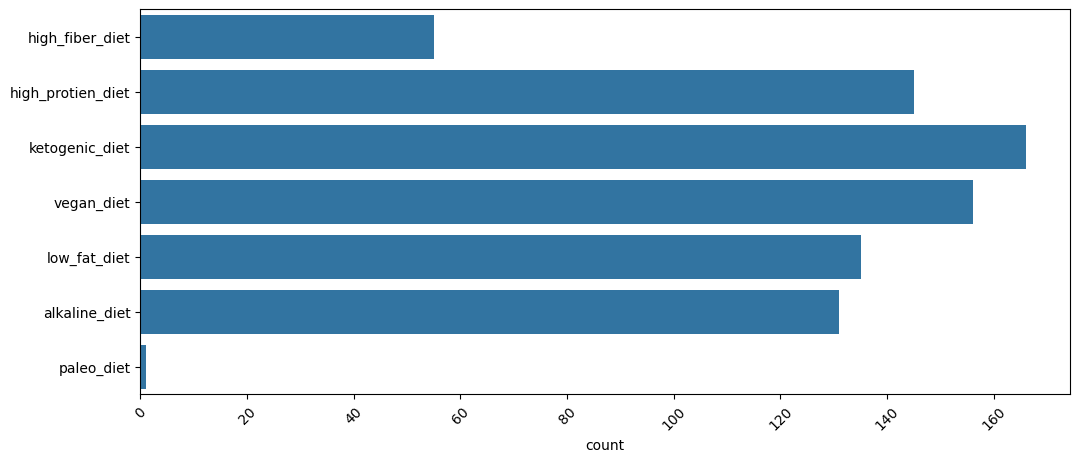

In [102]:
plt.figure(figsize=(12,5))
diet = []
for i in range(df_f.shape[0]):
    for j in df_f.loc[i,'Diet'].split():
        diet.append(j)
        
        
sns.countplot(diet)
plt.xticks(rotation=45)
plt.savefig('diet.png')
plt.show()

In [103]:

df_f.head()

,Meal_Id,Name,catagory,Veg_Non,Nutrient,Disease,Diet,Review
0,meal_id1,bok choy salad r,salad,veg,fiber,rickets diabeties kidney_disease goitre,high_fiber_diet high_protien_diet ketogenic_d...,1
1,meal_id2,millet curd rice r,rice,veg,carbohydrates,heart_disease goitre rickets diabeties kidney...,ketogenic_diet high_protien_diet vegan_diet,2
2,meal_id3,methi turmeric tea r,tea,veg,manganese,heart_disease,ketogenic_diet,10
3,meal_id4,tricolor veggie delight salad r,salad,veg,fiber,goitre rickets hypertension kidney_disease di...,ketogenic_diet high_protien_diet low_fat_diet...,1
4,meal_id5,non fried masala banana chips r,banana,veg,selenium,hypertension cancer,ketogenic_diet vegan_diet alkaline_diet high_...,10


user_activity file creation

In [114]:
df_rec = df[['User_Id','Name','catagory','Veg_Non','Review','Nutrient','Disease','Diet']]

df_rec = df_rec.drop_duplicates('User_Id').reset_index(drop=True)

user = []
for i in range(df_rec.shape[0]):
    k = df_rec.loc[i,'User_Id']
    user.append(f'User_{k}')
df_rec['User_Id'] = user
df_rec.to_csv('user_activity.csv',index=False)
df_rec.head(10)

,User_Id,Name,catagory,Veg_Non,Review,Nutrient,Disease,Diet
0,User_14,bok choy salad r,salad,veg,1,fiber,rickets diabeties kidney_disease goitre,high_fiber_diet high_protien_diet ketogenic_d...
1,User_57,millet curd rice r,rice,veg,2,carbohydrates,heart_disease goitre rickets diabeties kidney...,ketogenic_diet high_protien_diet vegan_diet
2,User_100,methi turmeric tea r,tea,veg,10,manganese,heart_disease,ketogenic_diet
3,User_50,tricolor veggie delight salad r,salad,veg,1,fiber,goitre rickets hypertension kidney_disease di...,ketogenic_diet high_protien_diet low_fat_diet...
4,User_43,non fried masala banana chips r,banana,veg,10,selenium,hypertension cancer,ketogenic_diet vegan_diet alkaline_diet high_...
5,User_24,green moong cutlet r,moong,veg,10,iron,heart_disease goitre scurvy hypertension diab...,alkaline_diet high_fiber_diet high_protien_di...
6,User_74,no-oil vegetable pulao r,pulao,veg,7,carbohydrates,scurvy heart_disease kidney_disease,high_fiber_diet high_protien_diet ketogenic_d...
7,User_73,apple oats chia seeds smoothie r,smoothie,veg,4,magnesium,obesity heart_disease goitre hypertension dia...,ketogenic_diet high_protien_diet vegan_diet h...
8,User_72,warm cucumber lemon salad r,salad,veg,10,fiber,goitre rickets scurvy diabeties kidney_disease,alkaline_diet high_fiber_diet high_protien_di...
9,User_26,turmeric milk tea r,tea,veg,9,vitamin_d,rickets heart_disease cancer kidney_disease,ketogenic_diet high_protien_diet low_fat_diet
